In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import joblib

In [2]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), make_column_selector(dtype_include='object')),
        ('scale', StandardScaler(), make_column_selector(dtype_include="number"))
         ],
    remainder="passthrough"
)
#strategy='most_frequent', ("PCA", PCA(n_components=3))
pipe = Pipeline([("Preprocessing", preprocessor), ('Imputer', SimpleImputer(strategy='most_frequent')), ('Outlier', LocalOutlierFactor(n_neighbors=20, contamination=0.1))], verbose=True)

In [3]:
df = sns.load_dataset('iris')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
pipe.fit(X)

[Pipeline] ..... (step 1 of 3) Processing Preprocessing, total=   0.0s
[Pipeline] ........... (step 2 of 3) Processing Imputer, total=   0.0s
[Pipeline] ........... (step 3 of 3) Processing Outlier, total=   0.0s


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c264f8f20>),
                                                 ('scale', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1c264f8cb0>)])),
                ('Imputer', SimpleImputer(strategy='most_frequent')),
                ('Outlier', LocalOutlierFactor(contamination=0.1))],
         verbose=True)

In [5]:
df_mod = pipe[:-1].transform(X)
df_mod_columns = pipe[:-1].get_feature_names_out()

In [6]:
df_mod = pd.DataFrame(df_mod, columns=df_mod_columns)
df_mod["target"] = y
df_mod.head()

,scale__sepal_length,scale__sepal_width,scale__petal_length,scale__petal_width,target
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


<Axes: ylabel='Density'>

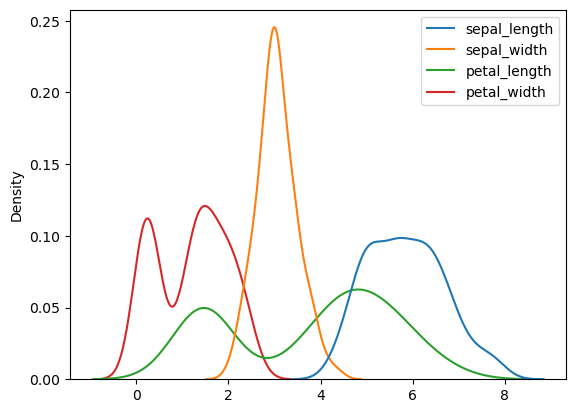

In [7]:
sns.kdeplot(X)

<Axes: ylabel='Density'>

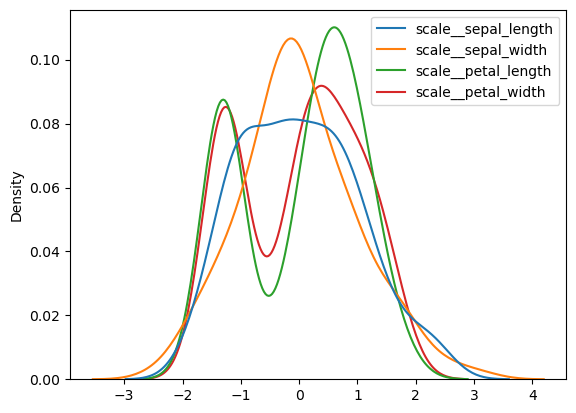

In [8]:
sns.kdeplot(df_mod)

In [9]:
joblib.dump(pipe, "pipeline.joblib")

['pipeline.joblib']

In [16]:
df = pipe[:-1].fit_transform(X)
df

[Pipeline] ..... (step 1 of 2) Processing Preprocessing, total=   2.8s
[Pipeline] ........... (step 2 of 2) Processing Imputer, total=   0.0s


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      